# 机器学习纳米学位
## 监督学习
## 项目2: 为*CharityML*寻找捐献者

欢迎来到机器学习工程师纳米学位的第二个项目！在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以**'练习'**开始的标题表示接下来的代码部分中有你必须要实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以'TODO'标出。请仔细阅读所有的提示！

除了实现代码外，你还必须回答一些与项目和你的实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。我们将根据你对问题的回答和撰写代码所实现的功能来对你提交的项目进行评分。
>**提示：**Code 和 Markdown 区域可通过**Shift + Enter**快捷键运行。此外，Markdown可以通过双击进入编辑模式。

## 开始

在这个项目中，你将使用1994年美国人口普查收集的数据，选用几个监督学习算法以准确地建模被调查者的收入。然后，你将根据初步结果从中选择出最佳的候选算法，并进一步优化该算法以最好地建模这些数据。你的目标是建立一个能够准确地预测被调查者年收入是否超过50000美元的模型。这种类型的任务会出现在那些依赖于捐款而存在的非营利性组织。了解人群的收入情况可以帮助一个非营利性的机构更好地了解他们要多大的捐赠，或是否他们应该接触这些人。虽然我们很难直接从公开的资源中推断出一个人的一般收入阶层，但是我们可以（也正是我们将要做的）从其他的一些公开的可获得的资源中获得一些特征从而推断出该值。

这个项目的数据集来自[UCI机器学习知识库](https://archive.ics.uci.edu/ml/datasets/Census+Income)。这个数据集是由Ron Kohavi和Barry Becker在发表文章_"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_之后捐赠的，你可以在Ron Kohavi提供的[在线版本](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf)中找到这个文章。我们在这里探索的数据集相比于原有的数据集有一些小小的改变，比如说移除了特征`'fnlwgt'` 以及一些遗失的或者是格式不正确的记录。

----
## 探索数据
运行下面的代码单元以载入需要的Python库并导入人口普查数据。注意数据集的最后一列`'income'`将是我们需要预测的列（表示被调查者的年收入会大于或者是最多50,000美元），人口普查数据中的每一列都将是关于被调查者的特征。

In [2]:
# 检查你的Python版本
from sys import version_info
if version_info.major != 2 and version_info.minor != 7:
    raise Exception('请使用Python 2.7来完成此项目')
else:
    print "您的Python版本符合要求!"

您的Python版本符合要求!


In [3]:
# 为这个项目导入需要的库
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # 允许为DataFrame使用display()

# 导入附加的可视化代码visuals.py
import visuals as vs

# 为notebook提供更加漂亮的可视化
%matplotlib inline

# 导入人口普查数据
data = pd.read_csv("census.csv")

# 成功 - 显示第一条记录
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


### 练习：数据探索
首先我们对数据集进行一个粗略的探索，我们将看看每一个类别里会有多少被调查者？并且告诉我们这些里面多大比例是年收入大于50,000美元的。在下面的代码单元中，你将需要计算以下量：

- 总的记录数量，`'n_records'`
- 年收入大于50,000美元的人数，`'n_greater_50k'`.
- 年收入最多为50,000美元的人数 `'n_at_most_50k'`.
- 年收入大于50,000美元的人所占的比例， `'greater_percent'`.

**提示：** 您可能需要查看上面的生成的表，以了解`'income'`条目的格式是什么样的。 

In [4]:
# TODO：总的记录数
n_records = len(data)
income_series = pd.Series(data["income"])

# TODO：被调查者的收入大于$50,000的人数
n_greater_50k = income_series.value_counts()[">50K"]
# TODO：被调查者的收入最多为$50,000的人数
n_at_most_50k = income_series.value_counts()["<=50K"]

# TODO：被调查者收入大于$50,000所占的比例
greater_percent = float(n_greater_50k) / float(n_records) * 100

# 打印结果
print "Total number of records: {}".format(n_records)
print "Individuals making more than $50,000: {}".format(n_greater_50k)
print "Individuals making at most $50,000: {}".format(n_at_most_50k)
print "Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent)

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


----
## 准备数据
在数据能够被作为输入提供给机器学习算法之前，它经常需要被清洗，格式化，和重新组织 - 这通常被叫做**预处理**。幸运的是，对于这个数据集，没有我们必须处理的无效或丢失的条目，然而，由于某一些特征存在的特性我们必须进行一定的调整。这个预处理都可以极大地帮助我们提升几乎所有的学习算法的结果和预测能力。

### 获得特征和标签
`income` 列是我们需要的标签，记录一个人的年收入是否高于50K。 因此我们应该把他从数据中剥离出来，单独存放。

In [5]:
# 将数据切分成特征和对应的标签
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

### 转换倾斜的连续特征

一个数据集有时可能包含至少一个靠近某个数字的特征，但有时也会有一些相对来说存在极大值或者极小值的不平凡分布的的特征。算法对这种分布的数据会十分敏感，并且如果这种数据没有能够很好地归一化处理会使得算法表现不佳。在人口普查数据集的两个特征符合这个描述：'`capital-gain'`和`'capital-loss'`。

运行下面的代码单元以创建一个关于这两个特征的条形图。请注意当前的值的范围和它们是如何分布的。

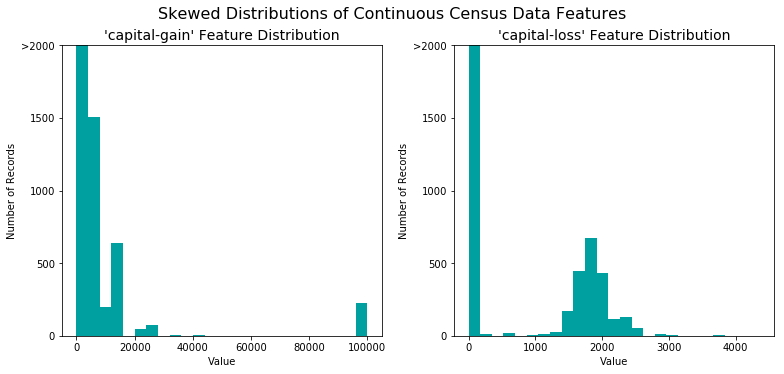

In [6]:
# 可视化 'capital-gain'和'capital-loss' 两个特征
vs.distribution(features_raw)

对于高度倾斜分布的特征如`'capital-gain'`和`'capital-loss'`，常见的做法是对数据施加一个<a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">对数转换</a>，将数据转换成对数，这样非常大和非常小的值不会对学习算法产生负面的影响。并且使用对数变换显著降低了由于异常值所造成的数据范围异常。但是在应用这个变换时必须小心：因为0的对数是没有定义的，所以我们必须先将数据处理成一个比0稍微大一点的数以成功完成对数转换。

运行下面的代码单元来执行数据的转换和可视化结果。再次，注意值的范围和它们是如何分布的。

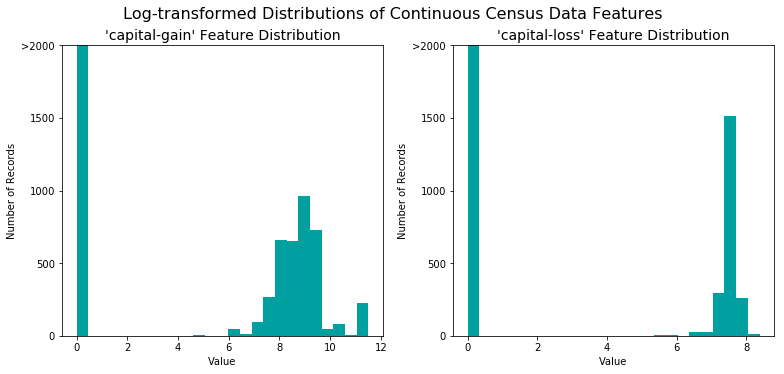

In [7]:
# 对于倾斜的数据使用Log转换
skewed = ['capital-gain', 'capital-loss']
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

# 可视化对数转换后 'capital-gain'和'capital-loss' 两个特征
vs.distribution(features_raw, transformed = True)

### 归一化数字特征
除了对于高度倾斜的特征施加转换，对数值特征施加一些形式的缩放通常会是一个好的习惯。在数据上面施加一个缩放并不会改变数据分布的形式（比如上面说的'capital-gain' or 'capital-loss'）；但是，归一化保证了每一个特征在使用监督学习器的时候能够被平等的对待。注意一旦使用了缩放，观察数据的原始形式不再具有它本来的意义了，就像下面的例子展示的。

运行下面的代码单元来归一化每一个数字特征。我们将使用[`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)来完成这个任务。

In [8]:
from sklearn.preprocessing import MinMaxScaler

# 初始化一个 scaler，并将它施加到特征上
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(data[numerical])

# 显示一个经过缩放的样例记录
display(features_raw.head(n = 1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.30137,State-gov,Bachelors,0.8,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States


### 练习：数据预处理

从上面的**数据探索**中的表中，我们可以看到有几个属性的每一条记录都是非数字的。通常情况下，学习算法期望输入是数字的，这要求非数字的特征（称为类别变量）被转换。转换类别变量的一种流行的方法是使用**独热编码**方案。独热编码为每一个非数字特征的每一个可能的类别创建一个_“虚拟”_变量。例如，假设`someFeature`有三个可能的取值`A`，`B`或者`C`，。我们将把这个特征编码成`someFeature_A`, `someFeature_B`和`someFeature_C`.

| 特征X |                    | 特征X_A | 特征X_B | 特征X_C |
| :-: |                            | :-: | :-: | :-: |
|  B  |  | 0 | 1 | 0 |
|  C  | ----> 独热编码 ----> | 0 | 0 | 1 |
|  A  |  | 1 | 0 | 0 |

此外，对于非数字的特征，我们需要将非数字的标签`'income'`转换成数值以保证学习算法能够正常工作。因为这个标签只有两种可能的类别（"<=50K"和">50K"），我们不必要使用独热编码，可以直接将他们编码分别成两个类`0`和`1`，在下面的代码单元中你将实现以下功能：
 - 使用[`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies)对`'features_raw'`数据来施加一个独热编码。
 - 将目标标签`'income_raw'`转换成数字项。
   - 将"<=50K"转换成`0`；将">50K"转换成`1`。

In [9]:
# TODO：使用pandas.get_dummies()对'features_raw'数据进行独热编码
features = pd.get_dummies(features_raw)

# TODO：将'income_raw'编码成数字值
income = pd.get_dummies(income_raw)
income = income[">50K"]

# 打印经过独热编码之后的特征数量
encoded = list(features.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

# 移除下面一行的注释以观察编码的特征名字
# print encoded

103 total features after one-hot encoding.


### 混洗和切分数据
现在所有的 _类别变量_ 已被转换成数值特征，而且所有的数值特征已被归一化。和我们一般情况下做的一样，我们现在将数据（包括特征和它们的标签）切分成训练和测试集。其中80%的数据将用于训练和20%的数据用于测试。然后再进一步把训练数据分为训练集和验证集，用来选择和优化模型。

运行下面的代码单元来完成切分。

In [10]:
# 导入 train_test_split
from sklearn.model_selection import train_test_split

# 将'features'和'income'数据切分成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(features, income, test_size = 0.2, random_state = 0,
                                                    stratify = income)
# 将'X_train'和'y_train'进一步切分为训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0,
                                                    stratify = y_train)

# 显示切分的结果
print "Training set has {} samples.".format(X_train.shape[0])
print "Validation set has {} samples.".format(X_val.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 28941 samples.
Validation set has 7236 samples.
Testing set has 9045 samples.


----
## 评价模型性能
在这一部分中，我们将尝试四种不同的算法，并确定哪一个能够最好地建模数据。四种算法包含一个*天真的预测器* 和三个你选择的监督学习器。

### 评价方法和朴素的预测器
*CharityML*通过他们的研究人员知道被调查者的年收入大于\$50,000最有可能向他们捐款。因为这个原因*CharityML*对于准确预测谁能够获得\$50,000以上收入尤其有兴趣。这样看起来使用**准确率**作为评价模型的标准是合适的。另外，把*没有*收入大于\$50,000的人识别成年收入大于\$50,000对于*CharityML*来说是有害的，因为他想要找到的是有意愿捐款的用户。这样，我们期望的模型具有准确预测那些能够年收入大于\$50,000的能力比模型去**查全**这些被调查者*更重要*。我们能够使用**F-beta score**作为评价指标，这样能够同时考虑查准率和查全率：

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$


尤其是，当 $\beta = 0.5$ 的时候更多的强调查准率，这叫做**F$_{0.5}$ score** （或者为了简单叫做F-score）。

### 问题 1 - 天真的(朴素)预测器的性能

通过查看收入超过和不超过 \$50,000 的人数，我们能发现多数被调查者年收入没有超过 \$50,000。如果我们简单地预测说*“这个人的收入没有超过 \$50,000”*，我们就可以得到一个 准确率超过 50% 的预测。这样我们甚至不用看数据就能做到一个准确率超过 50%。这样一个预测被称作是天真的。通常对数据使用一个*天真的预测器*是十分重要的，这样能够帮助建立一个模型表现是否好的基准。 使用下面的代码单元计算天真的预测器的相关性能。将你的计算结果赋值给`'accuracy'`, `‘precision’`, `‘recall’` 和 `'fscore'`，这些值会在后面被使用，请注意这里不能使用scikit-learn，你需要根据公式自己实现相关计算。

*如果我们选择一个无论什么情况都预测被调查者年收入大于 \$50,000 的模型，那么这个模型在**验证集上**的准确率，查准率，查全率和 F-score是多少？*  


In [26]:
#不能使用scikit-learn，你需要根据公式自己实现相关计算。
TP = float(income.sum(axis=0))
FN = 0.
FP = float(income.count() - income.sum(axis=0))

#TODO： 计算准确率
accuracy = float(income.sum(axis=0)) / income.count()

# TODO： 计算查准率 Precision
precision = TP / (TP + FP)
# TODO： 计算查全率 Recall
recall = TP / (TP + FN)

# TODO： 使用上面的公式，设置beta=0.5，计算F-score
fscore = (1 + 0.5 ** 2) * precision * recall / (0.5 ** 2 * precision + recall)

# 打印结果
print "Naive Predictor on validation data: \n \
    Accuracy score: {:.4f} \n \
    Precision: {:.4f} \n \
    Recall: {:.4f} \n \
    F-score: {:.4f}".format(accuracy, precision, recall, fscore)


# 使用scikit-learn.fbeta_score()验证计算结果
from sklearn.metrics import fbeta_score
y_pre_greater = np.ones(income.count(), dtype=int)
print "sklearn.fbeta_score:{:.4f}".format(fbeta_score(income.values, y_pre_greater, 0.5))

Naive Predictor on validation data: 
     Accuracy score: 0.2478 
     Precision: 0.2478 
     Recall: 1.0000 
     F-score: 0.2917
sklearn.fbeta_score:0.2917


## 监督学习模型
### 问题 2 - 模型应用

你能够在 [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) 中选择以下监督学习模型
- 高斯朴素贝叶斯 (GaussianNB)
- 决策树 (DecisionTree)
- 集成方法 (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K近邻 (K Nearest Neighbors)
- 随机梯度下降分类器 (SGDC)
- 支撑向量机 (SVM)
- Logistic回归（LogisticRegression）

从上面的监督学习模型中选择三个适合我们这个问题的模型，并回答相应问题。

### 模型1

**模型名称**

回答：集成方法(Gradient Boosting)


**描述一个该模型在真实世界的一个应用场景。（你需要为此做点研究，并给出你的引用出处）**

回答：搜索引擎搜索排序(http://www.voidcn.com/article/p-hcfyhxkw-baa.html) ， 美团O2O排序解决方案(https://tech.meituan.com/meituan-search-rank.html )。


**这个模型的优势是什么？他什么情况下表现最好？**

回答：优势：①当使用简单分类器时，计算出的结果是可以理解的，并且弱分类器的构造简单；③从偏差-方差分解的角度看，Gradient Boosting源于Boostring思想，主要关注降低偏差，因此Gradient Boosting能基于泛化性能相当弱的学习器构建出很强的集成学习模型；④应用广泛——Gradient Boosting求解方法为梯度下降，只要可求导的cost function都可以使用，算法通过组合弱分类器而得到强分类器，同时具有分类错误率上界随着训练增加而稳定下降、不会过拟合等性质，应该说是一种很适合于在各种回归、分类场景下应用的算法。<br>
当样本数据量不超过10万、异常值很少甚至没有、选用的基分类器准确率大于50%时，Gradient Boosting表现最好。

**这个模型的缺点是什么？什么条件下它表现很差？**

回答：缺点：①对对outlier(异常值)比较敏感；②Gradient Boosting迭代次数也就是弱分类器数目不太好设定；③训练比较耗时。<br>
当样本数据量很大(大于10万)、异常值很多、选用的基分类器准确率小于50%时，Gradient Boosting表现很差。

**根据我们当前数据集的特点，为什么这个模型适合这个问题。**

回答：①题目集成学习提供了4中算法，包括Boosting(AdaBoost,Gradient Boosting)和Bagging(Bagging,Random Forest)，从偏差-方差分解的角度来看，Boosting主要关注降低偏差，Bagging主要关注降低方差；从本次Project的任务来看，“我们期望的模型具有准确预测那些能够年收入大于$50,000的能力比模型去查全这些被调查者更重要”，即本次任务侧重于关注查准率，要求模型必须将降低偏差作为第一考虑因素，因而选择Boosting；②本次Project的数据集共有45222条数据，经过onehot编码后共有103个属性，标记是2类；决策树模型易于理解和解释，实现较简单，准确率较高，一般会超过50%，因此使用决策树作为基分类器；③GBDT(Gradient Boosting Decision Tree)可以用于回归也可以用于分类，当用于回归时，损失函数为最小二乘，用于分类时，可以采用指数损失函数，而Adaboost就是采用指数损失函数用于二类分类问题的一种特例；GBDT、Adaboost既可用于分类也可用于回归，本次Project为二分类问题，为提高效率和适应性，将分别采用GBDT、Adaboost建模，取性能优者。

### 模型2

**模型名称**

回答：K近邻 (K Nearest Neighbors)


**描述一个该模型在真实世界的一个应用场景。（你需要为此做点研究，并给出你的引用出处）**

回答：约会网站的数据分类，手写数字识别。http://blog.csdn.net/liyuefeilong/article/details/48162111

**这个模型的优势是什么？他什么情况下表现最好？**

回答：优势：①理论成熟，思想简单，既可以用来做分类也可以用来做回归；②可用于非线性分类；③对数据没有假设，准确度高，对outlier(异常值)不敏感；④KNN是一种在线技术，新数据可以直接加入数据集而不必进行重新训练。<br>
样本数据量不太大，样本缺失值很少，样本比较均衡(分类、回归均比较均衡)，且建模后需要获取很好的解释性，此时KNN算法能够获得最佳表现。

**这个模型的缺点是什么？什么条件下它表现很差？**

回答：缺点：①对于样本容量大的数据集计算量比较大；②样本不平衡时，预测偏差比较大；③KNN每一次分类都会重新进行一次全局运算，需要大量内存；④k值大小的选择有难度，k太小，有过拟合风险；k太大，有欠拟合风险。<br>
当样本数据量很大、且样本分类或标记数值不平衡时，KNN表现很差。

**根据我们当前数据集的特点，为什么这个模型适合这个问题。**

回答：当前数据集不大，且需要对建立的分类模型做出很好的解释，因而使用KNN算法建模。

### 模型3

**模型名称**

回答：Logistic回归（LogisticRegression）


**描述一个该模型在真实世界的一个应用场景。（你需要为此做点研究，并给出你的引用出处）**

回答：广告点击率预估。https://zhuanlan.zhihu.com/p/23499698 ，https://plushunter.github.io/2017/07/17/计算广告（2）：广告点击率预估的基本过程/

**这个模型的优势是什么？他什么情况下表现最好？**

回答：优势：①实现简单，广泛的应用于工业问题上；②分类时计算量非常小，速度很快，存储资源低，也很容易并行；③结果解释性强，在处理分类问题的同时还可能给出一个概率值；④样本各特性(属性)之间不需要满足条件独立假设，但各个特性的贡献是独立计算的。。<br>
监督学习目标为二分类或者多分类任务，样本的特性和标记符合线性关系、样本数据缺失值少甚至没有缺失值、样本特性不太多，此时Logistic回归表现最好。

**这个模型的缺点是什么？什么条件下它表现很差？**

回答：缺点：①仅能用于分类，且要求样本必须线性可分；②容易欠拟合，有时准确度不太高；③当特征空间很大时，Logistic回归的性能不是很好；④对于非线性特征，需要进行转换。
样本特性非线性、样本特性很多、样本特性与标记的线性关系不明显，此时Logistic回归表现很差。

**根据我们当前数据集的特点，为什么这个模型适合这个问题。**

回答：①题目任务为二分类问题，且样本特性与标记近似为线性关系；②样本特性较少，one-hot编码后只有103个；③样本数据量为45222，不太大，适合用Logistic回归建模；④Logistic回归训练、预测速断快，节省时间开支，且算法本身对存储资源消耗少，可以作为很多分类任务的基准分类器。

### 练习 - 创建一个训练和预测的流水线
为了正确评估你选择的每一个模型的性能，创建一个能够帮助你快速有效地使用不同大小的训练集并在验证集上做预测的训练和验证的流水线是十分重要的。
你在这里实现的功能将会在接下来的部分中被用到。在下面的代码单元中，你将实现以下功能：

 - 从[`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics)中导入`fbeta_score`和`accuracy_score`。
 - 用训练集拟合学习器，并记录训练时间。
 - 对训练集的前300个数据点和验证集进行预测并记录预测时间。
 - 计算预测训练集的前300个数据点的准确率和F-score。
 - 计算预测验证集的准确率和F-score。

In [21]:
# TODO：从sklearn中导入两个评价指标 - fbeta_score和accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_val, y_val): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_val: features validation set
       - y_val: income validation set
    '''
    
    results = {}
    
    # TODO：使用sample_size大小的训练数据来拟合学习器
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # 获得程序开始时间
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # 获得程序结束时间

    # TODO：计算训练时间
    results['train_time'] = duration_time(start, end)

    # TODO: 得到在验证集上的预测值
    # 然后得到对前300个训练数据的预测结果
    start = time() # 获得程序开始时间
    predictions_val = learner.predict(X_val)
    predictions_train = learner.predict(X_train[:300])
    end = time() # 获得程序结束时间

    # TODO：计算预测用时
    results['pred_time'] = duration_time(start, end)

    # 设置显示格式
    show_format = "{:.3f}"

    # TODO：计算在最前面的300个训练数据的准确率
    results['acc_train'] = show_format.format(accuracy_score(y_train[:300], predictions_train))

    # TODO：计算在验证上的准确率
    results['acc_val'] = show_format.format(accuracy_score(y_val, predictions_val))

    # TODO：计算在最前面300个训练数据上的F-score
    results['f_train'] = show_format.format(fbeta_score(y_train[:300], predictions_train, 0.5))

    # TODO：计算验证集上的F-score
    results['f_val'] = show_format.format(fbeta_score(y_val, predictions_val, 0.5))

    # 成功
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)

    # 返回结果
    return results

def duration_time(start, end, millisecond = 1):
    """
    计算持续时间，默认为秒(单位)，若需修改时间单位，设置第3个参数\n
    :param start: 开始时间(秒)\n
    :param end: 结束时间(秒)\n
    :param millisecond: 时间单位设置，默认为秒
    :return: 持续时间
    """
    return "{:.3f}".format(float(end - start)/millisecond)

# Gradient Boosting
def gb_classification():
    """
    创建并返回Gradient Boosting分类器
    :return: 已创建的Gradient Boosting分类器
    """
    from sklearn.ensemble import GradientBoostingClassifier
    clf = GradientBoostingClassifier(random_state=1)
    return clf
print train_predict(gb_classification(), len(X_train), np.array(X_train), np.array(y_train), np.array(X_val), np.array(y_val))

# KNN
def knn_classification(k):
    """
    创建并返回KNN分类器
    :param k: k值
    :return: 已创建的KNN分类器
    """
    from sklearn import neighbors
    clf = neighbors.KNeighborsClassifier(k)
    return clf
print train_predict(knn_classification(5), len(X_train), np.array(X_train), np.array(y_train), np.array(X_val), np.array(y_val))

# Logistic Regression
def lg_classification():
    """
    创建并返回LogisticRegression分类器
    :return: 已创建的LogisticRegression分类器
    """
    from sklearn.linear_model import LogisticRegression
    clf = LogisticRegression(random_state=1)
    return clf
print train_predict(lg_classification(), len(X_train), np.array(X_train), np.array(y_train), np.array(X_val), np.array(y_val))

GradientBoostingClassifier trained on 28941 samples.
{'pred_time': '0.026', 'train_time': '10.626', 'acc_train': '0.887', 'f_train': '0.761', 'acc_val': '0.871', 'f_val': '0.762'}
KNeighborsClassifier trained on 28941 samples.
{'pred_time': '30.590', 'train_time': '1.568', 'acc_train': '0.890', 'f_train': '0.753', 'acc_val': '0.822', 'f_val': '0.642'}
LogisticRegression trained on 28941 samples.
{'pred_time': '0.016', 'train_time': '0.941', 'acc_train': '0.870', 'f_train': '0.714', 'acc_val': '0.854', 'f_val': '0.718'}


### 附加：各监督学习模型训练、预测耗时及准确率、F-score比较
参与比较的监督学习包括：
- 高斯朴素贝叶斯 (GaussianNB)
- 决策树 (DecisionTree)
- 集成方法 (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K近邻 (K Nearest Neighbors)
- 随机梯度下降分类器 (SGDC)
- 支撑向量机 (SVM)
- Logistic回归（LogisticRegression）

比较内容包括：
- 训练时间
- 预测时间
- 训练集准确率
- 训练集F-score
- 验证集准确率
- 验证集F-score

数据来源：
各算法在Project2数据集上分别使用默认参数进行分类监督学习——在相同数据集和相同软、硬件运行环境条件下，调用scikit-learn中的监督学习类创建模型，调用train_predict函数计算、输出各比较数据。

创建模型、计算各模型性能数据的代码略，比较结果如下图所示：

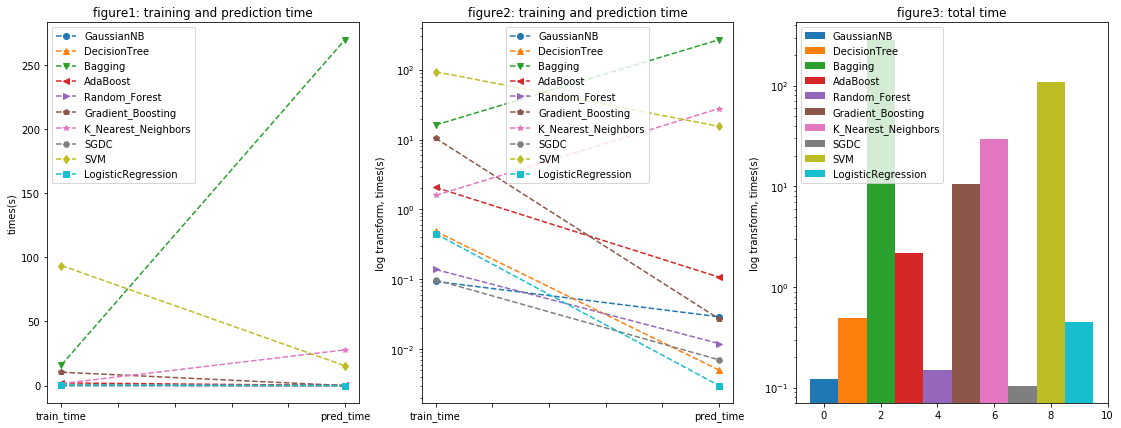

In [18]:
import matplotlib.pyplot as plt
import numpy as np

SUB_PLT_ARRAY_NAME = "pltarray"
SUB_PLT_NAME = "sub_plt"
TRAIN_PRE_TIMES = "train_pre_times"

def show_time_plt():
    """
    绘图显示训练时间、预测时间
    :return:无
    """
    fig, axes = plt.subplots(1, 3, figsize = (19,7))

    plt_left = axes[0]
    plt_left.set_title("figure1: training and prediction time")
    plt_left.set_ylabel("times(s)")
    plt_left.legend(handles=times_subplots_data(plt_left)[SUB_PLT_ARRAY_NAME])

    plt_middle = axes[1]
    plt_middle.set_title("figure2: training and prediction time")
    plt_middle.set_yscale('log')
    plt_middle.set_ylabel("log transform, times(s)")
    subplt_data = times_subplots_data(plt_middle)
    plt_middle.legend(handles=subplt_data[SUB_PLT_ARRAY_NAME])

    plt_right = axes[2]
    plt_right.set_title("figure3: total time")
    ALG_NAME = "alg_name"
    TOTAL_TIME = "total_time"
    trainandpre_totaltime = pd.DataFrame({
        ALG_NAME: ["GaussianNB", "DecisionTree", "Bagging", "AdaBoost", "Random_Forest", "Gradient_Boosting", "K_Nearest_Neighbors"
            , "SGDC", "SVM", "LogisticRegression"],
        TOTAL_TIME: [np.array(tp).sum() for tp in subplt_data[TRAIN_PRE_TIMES]]
    })
    bar_figs = []
    bar_labels = []
    for i in range(len(trainandpre_totaltime)):
        bar_figs.append(plt_right.bar(i, trainandpre_totaltime[TOTAL_TIME][i], width=1.0))
        bar_labels.append(trainandpre_totaltime[ALG_NAME][i])
    plt_right.set_yscale('log')
    plt_right.set_ylabel("log transform, times(s)")
    plt_right.legend(handles=bar_figs, labels=bar_labels)

    plt.show()

def times_subplots_data(plt_sub):
    x_axis = [0,1]
    GaussianNB = [0.093, 0.029]
    DecisionTree = [0.485, 0.005]
    Bagging = [16.178, 269.701]
    AdaBoost = [2.066, 0.107]
    Random_Forest = [0.138, 0.012]
    Gradient_Boosting = [10.448, 0.027]
    K_Nearest_Neighbors = [1.587, 27.873]
    SGDC = [0.098, 0.007]
    SVM = [93.601, 15.457]
    LogisticRegression = [0.448, 0.003]

    label0, = plt_sub.plot(x_axis, GaussianNB, "o--", label="GaussianNB")
    label1, = plt_sub.plot(x_axis, DecisionTree, "^--", label="DecisionTree")
    label2, = plt_sub.plot(x_axis, Bagging,"v--", label="Bagging")
    label3, = plt_sub.plot(x_axis, AdaBoost, "<--", label="AdaBoost")
    label4, = plt_sub.plot(x_axis, Random_Forest,">--", label="Random_Forest")
    label5, = plt_sub.plot(x_axis, Gradient_Boosting, "p--", label="Gradient_Boosting")
    label6, = plt_sub.plot(x_axis, K_Nearest_Neighbors, "*--", label="K_Nearest_Neighbors")
    label7, = plt_sub.plot(x_axis, SGDC,"H--", label="SGDC")
    label8, = plt_sub.plot(x_axis, SVM, "d--", label="SVM")
    label9, = plt_sub.plot(x_axis, LogisticRegression,"s--", label="LogisticRegression")
    plt_sub.set_xticklabels(['', 'train_time', '', '', '', '', 'pred_time'])

    subplt_pltarry = {
        SUB_PLT_NAME: plt_sub,
        SUB_PLT_ARRAY_NAME: [label0, label1, label2, label3, label4, label5, label6, label7, label8, label9],
        TRAIN_PRE_TIMES: [GaussianNB, DecisionTree, Bagging, AdaBoost, Random_Forest, Gradient_Boosting, K_Nearest_Neighbors, SGDC, 
                          SVM, LogisticRegression]
    }
    return subplt_pltarry

show_time_plt()

上述图(figure1,figure2，figure3)为各算法训练消耗时间、预测消耗时间的对比，figure1和figure2的横轴train_time处表示训练消耗时间、pred_time处表示预测消耗时间。figure1纵轴为实际消耗时间的直观表示，figure2纵轴为实际消耗时间经过log变换后的值，以便于对比查看各监督学习算法的耗时。figure3为各监督学习算法在训练消耗时间与预测消耗时间上的总和<br>
从图中可以看出：<br>
1. 对于Bagging、K_Nearest_Neighbors算法，其预测耗时远高于训练耗时及其他监督学习算法，尤其是Bagging算法，预测耗时远高于其他监督学习算法且是预测耗时最少的LogisticRegression算法的万倍以上；除此之外，其他监督学习算法的训练耗时均(远)高于预测耗时；
2. SVM算法训练耗时最长，且远高于其他算法；SGDC和GaussianNB算法训练耗时最短；
3. 除Bagging、K_Nearest_Neighbors、SVM外，其余算法预测耗时都很短且差别不大，其中耗时最短的是LogisticRegression算法；
4. 综合训练耗时与预测耗时可以看出(figure3)，最耗时的算法为Bagging且远高于绝大多数其他算法，最节省时间的为SGDC算法；各算法耗时从高到低的顺序为：Bagging > SVM > K_Nearest_Neighbors > Gradient_Boosting > AdaBoost > DecisionTree >= LogisticRegression > Random_Forest >= GaussianNB > SGDC.

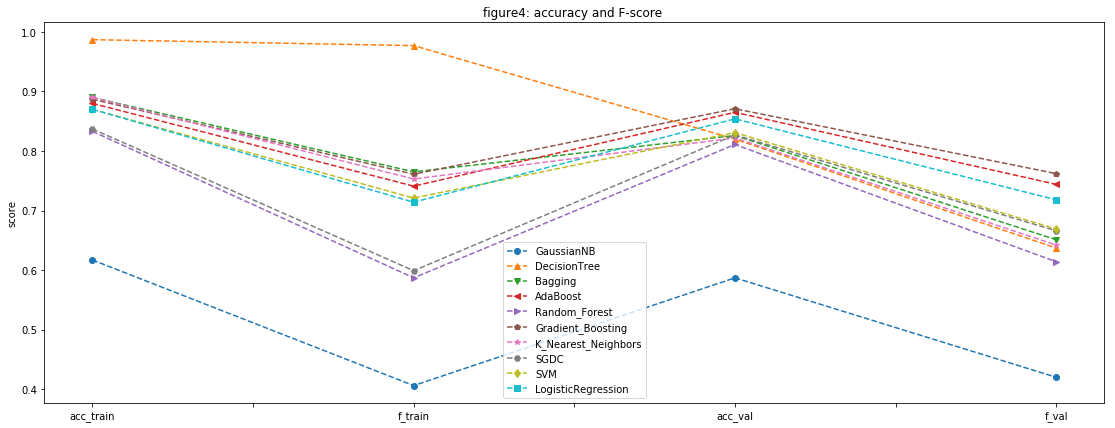

In [19]:
def show_acc_fbeta_score_plt():
    """
    绘图显示准确率、F-score
    :return:无
    """
    fig, axes = plt.subplots(1, 1, figsize = (19,7))
    plt_left = axes
    plt_left.set_title("figure4: accuracy and F-score ")
    plt_left.set_ylabel("score")
    plt_left.legend(handles=acc_subplots_data(plt_left)[SUB_PLT_ARRAY_NAME])

    plt.show()

def acc_subplots_data(plt_sub):
    x_axis = [0, 1, 2, 3]
    GaussianNB = [0.617, 0.406, 0.587, 0.420]
    DecisionTree = [0.987, 0.977, 0.820, 0.637]
    Bagging = [0.890, 0.765, 0.826, 0.651]
    AdaBoost = [0.880, 0.741, 0.865, 0.744]
    Random_Forest = [0.833, 0.587, 0.811, 0.614]
    Gradient_Boosting = [0.887, 0.761, 0.871, 0.762]
    K_Nearest_Neighbors = [0.890, 0.753, 0.822, 0.642]
    SGDC = [0.837, 0.599, 0.827, 0.666]
    SVM = [0.870, 0.721, 0.831, 0.669]
    LogisticRegression = [0.870, 0.714, 0.854, 0.718]

    label0, = plt_sub.plot(x_axis, GaussianNB, "o--", label="GaussianNB")
    label1, = plt_sub.plot(x_axis, DecisionTree, "^--", label="DecisionTree")
    label2, = plt_sub.plot(x_axis, Bagging,"v--", label="Bagging")
    label3, = plt_sub.plot(x_axis, AdaBoost, "<--", label="AdaBoost")
    label4, = plt_sub.plot(x_axis, Random_Forest,">--", label="Random_Forest")
    label5, = plt_sub.plot(x_axis, Gradient_Boosting, "p--", label="Gradient_Boosting")
    label6, = plt_sub.plot(x_axis, K_Nearest_Neighbors, "*--", label="K_Nearest_Neighbors")
    label7, = plt_sub.plot(x_axis, SGDC,"H--", label="SGDC")
    label8, = plt_sub.plot(x_axis, SVM, "d--", label="SVM")
    label9, = plt_sub.plot(x_axis, LogisticRegression,"s--", label="LogisticRegression")
    plt_sub.set_xticklabels(['', 'acc_train', '', 'f_train', '', 'acc_val', '', 'f_val'])

    subplt_pltarry = {
        SUB_PLT_NAME: plt_sub,
        SUB_PLT_ARRAY_NAME: [label0, label1, label2, label3, label4, label5, label6, label7, label8, label9]
    }
    return subplt_pltarry

show_acc_fbeta_score_plt()

上图(figure4)为各监督学习模型在默认参数情况下，分别在训练集和验证集上的准确率、F-score得分，横轴acc_train处表示训练集准确率、f_train处表示训练集F-score、acc_val处表示验证集准确率、f_val处表示验证集F-score，从图中可以看出：
1. 以准确率、F-score为衡量依据，所有模型均优于前文所述的天真(朴素)预测器；
2. DecisionTree模型在训练集上的准确率、F-score得分最高，但是在验证集上准确率、F-score得分均较低，模型过拟合；
3. GaussianNB在训练集、验证集上的准确率、F-score得分均大幅低于其他模型，说明模型性能过差或者欠拟合，其性能参数不具有参考价值；
4. Random Forest、SGDC模型在训练集上的准确率、F-score得分较低，但在验证集上的准确率、F-score得分与其他表现稳定的分类器差别不大，认为这2个模型的性能参数有参考价值；
5. 除DecisionTree、GaussianNB外，其余各监督学习模型表现稳定，准确率、F-score得分数据相差不大且趋于一致；
6. 本Project中，“我们期望的模型具有准确预测那些能够年收入大于$50,000的能力比模型去查全这些被调查者更重要”，表明查准率是最重要的衡量指标，因此以F-score得分作为依据，各分类器性能由好至差的顺序为：Gradient Boosting > AdaBoost > LogisticRegression > SVM > SGDC > Bagging > K Nearest Neighbors > Random Forest 。

### 练习：初始模型的评估
在下面的代码单元中，您将需要实现以下功能：             
- 导入你在前面讨论的三个监督学习模型。             
- 初始化三个模型并存储在`'clf_A'`，`'clf_B'`和`'clf_C'`中。
  - 使用模型的默认参数值，在接下来的部分中你将需要对某一个模型的参数进行调整。             
  - 设置`random_state`  (如果有这个参数)。       
- 计算1%， 10%， 100%的训练数据分别对应多少个数据点，并将这些值存储在`'samples_1'`, `'samples_10'`, `'samples_100'`中

**注意：**取决于你选择的算法，下面实现的代码可能需要一些时间来运行！

GradientBoostingClassifier trained on 289 samples.
GradientBoostingClassifier trained on 2894 samples.
GradientBoostingClassifier trained on 28941 samples.
KNeighborsClassifier trained on 289 samples.
KNeighborsClassifier trained on 2894 samples.
KNeighborsClassifier trained on 28941 samples.
LogisticRegression trained on 289 samples.
LogisticRegression trained on 2894 samples.
LogisticRegression trained on 28941 samples.


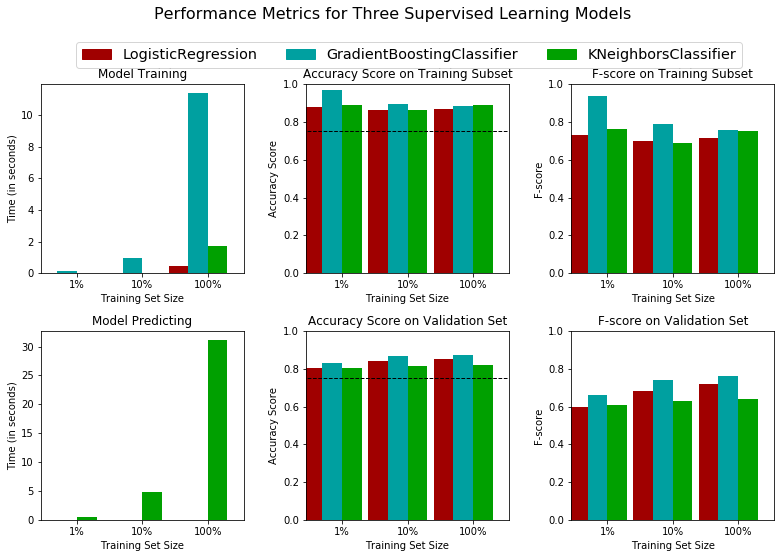

In [23]:
# TODO：从sklearn中导入三个监督学习模型

# TODO：初始化三个模型
clf_A = gb_classification()
clf_B = knn_classification(5)
clf_C = lg_classification()

# TODO：计算1%， 10%， 100%的训练数据分别对应多少点
samples_1 = int(len(X_train)*0.01)
samples_10 = int(len(X_train)*0.1)
samples_100 = len(X_train)

# 收集学习器的结果
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, np.array(X_train), np.array(y_train), np.array(X_val), np.array(y_val))

# 对选择的三个模型得到的评价结果进行可视化
vs.evaluate(results, accuracy, fscore)

----
## 提高效果

在这最后一节中，您将从三个有监督的学习模型中选择 *最好的* 模型来使用学生数据。你将在整个训练集（`X_train`和`y_train`）上使用网格搜索优化至少调节一个参数以获得一个比没有调节之前更好的 F-score。

### 问题 3 - 选择最佳的模型

*基于你前面做的评价，用一到两段话向 *CharityML* 解释这三个模型中哪一个对于判断被调查者的年收入大于 \$50,000 是最合适的。*             
**提示：**你的答案应该包括评价指标，预测/训练时间，以及该算法是否适合这里的数据。

**回答：**
Gradient Boosting模型对于本次任务是最合适的，原因有以下3点：
1. 对于本次任务，“我们期望的模型具有准确预测那些能够年收入大于$50,000的能力比模型去查全这些被调查者更重要”，说明模型应具有尽可能高的查准率，因此应将F-score(β=0.5)作为最重要的评价指标和选择依据，对比上述3个模型，在训练集和验证集上，Gradient Boosting模型的得分为最高，且Gradient Boosting也具有最好的准确率；
2. 从训练/预测时间来看，训练时，Gradient Boosting模型耗时最长，预测时耗时居中；训练耗时与预测耗时之和居中且远小于K Nearest Neighbors模型耗时；参考准确率和F-score，时间非最优可以接受；
3. 数据集经过one-hot编码后，有103个属性，相对于成千上万条样例数而言，该数据集属性数量较少，利于Gradient Boosting算法把属性(特征)空间划分为多个区域，每个区域返回某个值作为决策树的预测值，在迭代的时候选择梯度下降的方向来保证最后的结果最好。

### 问题 4 - 用通俗的话解释模型

*用一到两段话，向 *CharityML* 用外行也听得懂的话来解释最终模型是如何工作的。你需要解释所选模型的主要特点。例如，这个模型是怎样被训练的，它又是如何做出预测的。避免使用高级的数学或技术术语，不要使用公式或特定的算法名词。*

**回答： ** 
1. 从已有的普查数据中取80%作为训练集，再将训练集中的80%数据用于训练、剩余20%用于验证模型的性能；
2. 在训练模型时，依次(one-by-one)基于属性构建决策树，并且将各已经构建的决策树预测结果与真实结果进行比对(差值)，比对的差值称之为残差，当有下1个新的决策树加入模型时，计算现有模型加入该新决策树后的残差，并调整新决策树参数使整个模型的残差向减小的方向移动，从而使新决策树加入后，整个模型的残差变小，如此反复，直至完成设定的循环次数或达到基于属性分类的终止条件；
3. 将验证数据导入包含所有有效规则的模型，依据已有规则对验证数据进行分类，即判断出哪些普查对象的年收入大于50k美元，这一过程称之为预测；为评价模型预测结果的准确性，可将预测结果与验证集的真实情况进行对比，以此判断模型的性能如何。

### 练习：模型调优
调节选择的模型的参数。使用网格搜索（GridSearchCV）来至少调整模型的重要参数（至少调整一个），这个参数至少需尝试3个不同的值。你要使用整个训练集来完成这个过程。在接下来的代码单元中，你需要实现以下功能：

- 导入[`sklearn.model_selection.GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) 和 [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- 初始化你选择的分类器，并将其存储在`clf`中。
 - 设置`random_state` (如果有这个参数)。
- 创建一个对于这个模型你希望调整参数的字典。
 - 例如: parameters = {'parameter' : [list of values]}。
 - **注意：** 如果你的学习器有 `max_features` 参数，请不要调节它！
- 使用`make_scorer`来创建一个`f_score`评分对象（设置$\beta = 0.5$）。
- 在分类器clf上用'scorer'作为评价函数运行网格搜索，并将结果存储在grid_obj中。
- 用训练集（X_train, y_train）训练grid search object,并将结果存储在`grid_fit`中。

**注意：** 取决于你选择的参数列表，下面实现的代码可能需要花一些时间运行！

In [41]:
def score_function(y_true, y_red):
    """
    网格搜索时的得分函数，该值越大说明模型越好
    :param y_true: 标记真实值
    :param y_red: 标记预测值
    :return: 得分
    """
    return fbeta_score(y_true, y_red, 0.5)


# TODO：导入'GridSearchCV', 'make_scorer'和其他一些需要的库
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# TODO：初始化分类器
clf = gb_classification()

# TODO：创建你希望调节的参数列表
parameters = parameters = {"n_estimators": range(90, 151, 10),"max_depth": range(4, 10), "min_samples_split": range(5, 21, 5)}

# TODO：创建一个fbeta_score打分对象
scorer = make_scorer(score_function)

# TODO：在分类器上使用网格搜索，使用'scorer'作为评价函数
cross_validator = KFold(n_splits=10, shuffle=True, random_state=1)
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=scorer, cv=cross_validator)

# TODO：用训练数据拟合网格搜索对象并找到最佳参数

# 得到estimator
best_clf = grid_obj.best_estimator_

# 使用没有调优的模型做预测
predictions = (clf.fit(X_train, y_train)).predict(X_val)
best_predictions = best_clf.predict(X_val)

# 汇报调参前和调参后的分数
print "Unoptimized model\n------"
print "Accuracy score on validation data: {:.4f}".format(accuracy_score(y_val, predictions))
print "F-score on validation data: {:.4f}".format(fbeta_score(y_val, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the validation data: {:.4f}".format(accuracy_score(y_val, best_predictions))
print "Final F-score on the validation data: {:.4f}".format(fbeta_score(y_val, best_predictions, beta = 0.5))

此处运行非常耗时，在PyCharm中运行后，输出如下结果(网格搜索的最优结果为：n_estimators=120,max_depth=5，min_samples_split=15)：

Unoptimized model
------
Accuracy score on validation data: 0.8708 <br>
F-score on validation data: 0.7622

Optimized Model
------
Final accuracy score on the validation data: 0.8769<br>
Final F-score on the validation data: 0.7666<br>
grid_obj.best_estimator_: GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=15,
              min_weight_fraction_leaf=0.0, n_estimators=120,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)


### 问题 5 - 最终模型评估

_你的最优模型在测试数据上的准确率和 F-score 是多少？这些分数比没有优化的模型好还是差？你优化的结果相比于你在**问题 1**中得到的天真预测器怎么样？_  
**注意：**请在下面的表格中填写你的结果，然后在答案框中提供讨论。

#### 结果:
 
| 评价指标         | 天真预测器           | 未优化的模型        | 优化的模型        |
| :------------: | :-----------------: | :---------------: | :-------------: | 
| 准确率         |   0.2478            |     0.8708        |      0.8769     |
| F-score        |   0.2917           |     0.7622        |      0.7666     |

**回答：**  最优模型的准确率为0.8769，F-score为0.7666，均优于未优化的模型，而且该性能参数比天真(朴素)预测器的好很多。

----
## 特征的重要性

在数据上（比如我们这里使用的人口普查的数据）使用监督学习算法的一个重要的任务是决定哪些特征能够提供最强的预测能力。专注于少量的有效特征和标签之间的关系，我们能够更加简单地理解这些现象，这在很多情况下都是十分有用的。在这个项目的情境下这表示我们希望选择一小部分特征，这些特征能够在预测被调查者是否年收入大于\$50,000这个问题上有很强的预测能力。

选择一个有 `'feature_importance_'` 属性的scikit学习分类器（例如 AdaBoost，随机森林）。`'feature_importance_'` 属性是对特征的重要性排序的函数。在下一个代码单元中用这个分类器拟合训练集数据并使用这个属性来决定人口普查数据中最重要的5个特征。

### 问题 6 - 观察特征相关性

当**探索数据**的时候，它显示在这个人口普查数据集中每一条记录我们有十三个可用的特征。             
_在这十三个记录中，你认为哪五个特征对于预测是最重要的，选择每个特征的理由是什么？你会怎样对他们排序？_

**回答：**
- 特征1:age，年龄与财富有关联，年长者倾向于有更多财富(年收入超过50k美元)，因此也很可能成为募捐对象
- 特征2:capital-gain，资本收益，表明普查对象的投资收益情况，与普查对象的年收入有直接关系，有资本收益或资本收益高者很可能年收入超过50k美元
- 特征3:capital-loss，资本损失，有足够收入的普查对象才有能力进行财经投资，虽然资本损失了，但不能掩盖其年入超过50k美元的事实
- 特征4:hours-per-week，每周工作时间与收入时间，工作时间多可能有更多的收入，也许会年收入超过50k美元
- 特征5:marital-status，婚姻状态与家庭、财富相关，正常夫妻一般有稳定且较高的收入(年收入超过50k美元)，可能对募捐慷慨解囊

### 练习 - 提取特征重要性

选择一个`scikit-learn`中有`feature_importance_`属性的监督学习分类器，这个属性是一个在做预测的时候根据所选择的算法来对特征重要性进行排序的功能。

在下面的代码单元中，你将要实现以下功能：
 - 如果这个模型和你前面使用的三个模型不一样的话从sklearn中导入一个监督学习模型。
 - 在整个训练集上训练一个监督学习模型。
 - 使用模型中的 `'feature_importances_'`提取特征的重要性。

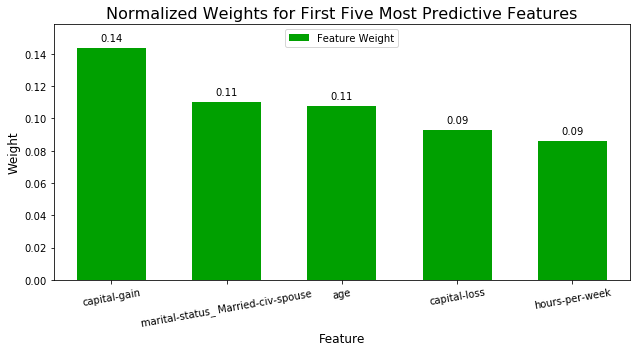

In [30]:
# TODO：导入一个有'feature_importances_'的监督学习模型

# TODO：在训练集上训练一个监督学习模型
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=120, max_depth=5, min_samples_split=15,random_state=1)

XX_train = np.array(X_train)
yy_train = np.array(y_train)
model = model.fit(XX_train, yy_train)
importances = model.feature_importances_

# 绘图
vs.feature_plot(importances, X_train, y_train)

### 问题 7 - 提取特征重要性
观察上面创建的展示五个用于预测被调查者年收入是否大于\$50,000最相关的特征的可视化图像。

_这五个特征的权重加起来是否超过了0.5?_<br>
_这五个特征和你在**问题 6**中讨论的特征比较怎么样？_<br>
_如果说你的答案和这里的相近，那么这个可视化怎样佐证了你的想法？_<br>
_如果你的选择不相近，那么为什么你觉得这些特征更加相关？_

**回答：**
1. 这五个特征的权重加起来超过了0.5，权重总和为0.54
2. 这五个特征和你在问题 6中讨论的特征相比保持一致，只是capital-gain、marital-status的权重高于预期，age、capital-loss的权重比预想的低一些
3. 可视化图形所列出的权重最高的5个特征与问题6给出的一致，权重按照从大到小的顺序为：capital-gain，marital-status_ Married-civ-spouse，age，capital-loss，hours-per-week
4. 选择相近，选择原因已在问题6中给出

### 特征选择

如果我们只是用可用特征的一个子集的话模型表现会怎么样？通过使用更少的特征来训练，在评价指标的角度来看我们的期望是训练和预测的时间会更少。从上面的可视化来看，我们可以看到前五个最重要的特征贡献了数据中**所有**特征中超过一半的重要性。这提示我们可以尝试去**减小特征空间**，简化模型需要学习的信息。下面代码单元将使用你前面发现的优化模型，并**只使用五个最重要的特征**在相同的训练集上训练模型。

In [32]:
# 导入克隆模型的功能
from sklearn.base import clone

importances = ["age", "capital-gain", "hours-per-week", "marital-status_ Married-civ-spouse", "capital-loss"]

# 减小特征空间
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_val_reduced = X_val[X_val.columns.values[(np.argsort(importances)[::-1])[:5]]]

# 最优模型
best_clf = GradientBoostingClassifier(n_estimators=120, max_depth=5, min_samples_split=15,random_state=1)

XX_train = np.array(X_train)
yy_train = np.array(y_train)
XX_val = np.array(X_val)
yy_val = np.array(y_val)
# 使用全部数据训练
predictions = best_clf.fit(XX_train, yy_train)
best_predictions = predictions.predict(XX_val)

# 在前面的网格搜索的基础上训练一个“最好的”模型
clf_on_reduced = (clone(best_clf)).fit(X_train_reduced.values, yy_train)

# 做一个新的预测
reduced_predictions = clf_on_reduced.predict(X_val_reduced)

# 对于每一个版本的数据汇报最终模型的分数
print "Final Model trained on full data\n------"
print "Accuracy on validation data: {:.4f}".format(accuracy_score(yy_val, best_predictions))
print "F-score on validation data: {:.4f}".format(fbeta_score(yy_val, best_predictions, beta = 0.5))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on validation data: {:.4f}".format(accuracy_score(yy_val, reduced_predictions))
print "F-score on validation data: {:.4f}".format(fbeta_score(yy_val, reduced_predictions, beta = 0.5))

Final Model trained on full data
------
Accuracy on validation data: 0.8769
F-score on validation data: 0.7669

Final Model trained on reduced data
------
Accuracy on validation data: 0.8467
F-score on validation data: 0.7175


### 问题 8 - 特征选择的影响

*最终模型在只是用五个特征的数据上和使用所有的特征数据上的 F-score 和准确率相比怎么样？*  
*如果训练时间是一个要考虑的因素，你会考虑使用部分特征的数据作为你的训练集吗？*

**回答：**
1. 最终模型在只是用五个特征的数据上和使用所有的特征数据上的 F-score 和准确率相比较低，全部特征数据时模型准确率为0.8769、F-score为0.7669，用5个特征数据时模型准确率降为0.8467、F-score降为0.7175.
2. 如果训练时间是一个需要考虑的因素，在准确率、F-score等性能参数下降不是很多、符合监督学习应用场景要求的情况下，会考虑使用部分特征的数据作为训练集.

### 问题 9 - 在测试集上测试你的模型

终于到了测试的时候，记住，测试集只能用一次。

*使用你最有信心的模型，在测试集上测试，计算出准确率和 F-score。*
*简述你选择这个模型的原因，并分析测试结果*

In [33]:
yy_val = np.array(y_test)
best_predictions = predictions.predict(X_test.values)
print "Accuracy on validation data: {:.4f}".format(accuracy_score(yy_val, best_predictions))
print "F-score on validation data: {:.4f}".format(fbeta_score(yy_val, best_predictions, beta = 0.5))

Accuracy on validation data: 0.8723
F-score on validation data: 0.7592


最终选择优化参数后的GradientBoostingClassifier, 选择该模型的原因：
1. 在相同数据集及软、硬件运行环境条件下，使用默认参数训练并验证各模型(共10个)，Gradient Boosting算法训练出的模型在验证集上具有最高的F-score及准确率，且未出现过拟合现象；
2. 使用网格搜索对GradientBoostingClassifier进行最优参数搜寻时，获取到最优参数，且在最优参数条件下，准确率、F-score有较明显提高；
3. 综上所述，有理由认为最优参数条件下的GradientBoostingClassifier是完成本项目任务的最优模型。

测试结果分析：

1. 使用最优模型在测试集上进行预测(测试)，预测准确率及F-score与该模型在验证集上的得分非常接近，且稍稍优于验证集得分，说明最优模型的预测是非常合理和可信的；
2. 使用该最优模型，将其用于紧邻1994年之后美国人口普查收集的数据，预测年收入大于50k美元的人群，准确率达到87%；且在预测的年收入超过50k美元的人群中，有76%是真正收入超过50k的居民，这也是募捐机构所感兴趣的对象。

> **注意：** 当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出**File -> Download as -> HTML (.html)**把这个 HTML 和这个 iPython notebook 一起做为你的作业提交。